In [1]:
"""'Sentiment evaluation - This is taken into consideration an emerging subject matter these days . This research paper targets to reap a dataset of tweetsnand practice extraordinary device studying algorithms to analyze and classify texts. This researchnpaper explored textual content classification accuracy even as using distinct classifiers for classifyingnbalanced and unbalanced datasets.'"""

"'Sentiment evaluation - This is taken into consideration an emerging subject matter these days . This research paper targets to reap a dataset of tweetsnand practice extraordinary device studying algorithms to analyze and classify texts. This researchnpaper explored textual content classification accuracy even as using distinct classifiers for classifyingnbalanced and unbalanced datasets.'"

## Importing Liberaries

In [2]:
## Basic Liberaries

import numpy as np
""" For reading CSV """
import pandas as pd
import multiprocessing as mp
import string

## preprocessing liberaries

import nltk                                                         # import nltk for natural language processing

## Data visualising liberaries

from matplotlib import pyplot as plt                                # import pyplot for visulaising the data
import re
from matplotlib import patches as mpatches
%matplotlib inline
import seaborn as sns                                               # import seaborn for data visusalising

## classification liberaries -- Model Importing

from sklearn.ensemble import RandomForestClassifier                 # import Random Forest Classifier from sklearn -- classification model
from sklearn.naive_bayes import GaussianNB                          # import Naive Bayes from sklearn   
from sklearn.model_selection import train_test_split                # for train test split 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB                       # Import multinomialNB -- It is a classification model
from sklearn.feature_extraction.text import TfidfVectorizer         # import tfidf vectorisation from sklear FOr Vectorisation Process 
from sklearn.linear_model import LogisticRegression                 # Logistic Regression
from sklearn.svm import LinearSVC                                   
from sklearn.preprocessing import OrdinalEncoder                    # For encodeing the text into number

In [3]:
tweets = pd.read_csv('Tweets.csv')

dataset = tweets.copy()

<AxesSubplot:>

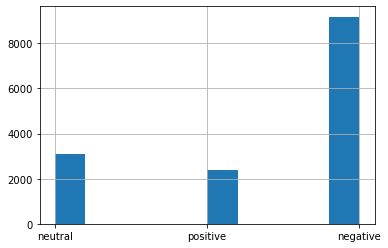

In [4]:
dataset['airline_sentiment'].hist()

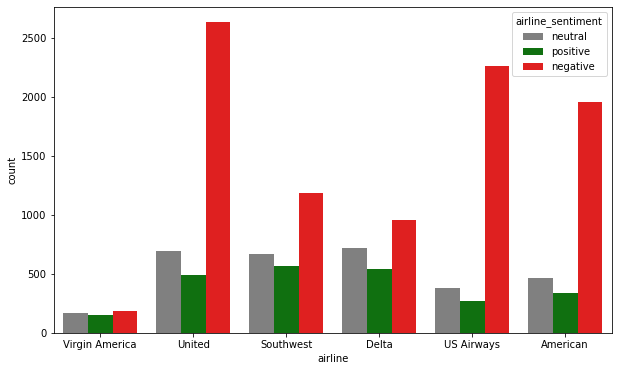

In [5]:
plt.rcParams["figure.figsize"] = (10,6)

#ref: https://stackoverflow.com/questions/46173419/seaborn-change-bar-color-according-to-hue-name
colors ={"neutral": "gray", "positive": "green", "negative": "red"}
ax = sns.countplot(data = dataset, x ="airline", hue = "airline_sentiment", palette=colors)

In [6]:
dataset.drop(['tweet_id' , 'airline_sentiment_confidence' , 'negativereason' , 'negativereason_gold' , 'airline_sentiment_gold' , 'name' , 'user_timezone' , 'tweet_location' , 'tweet_created' , 'tweet_coord' ,'negativereason_gold', 'retweet_count' , 'negativereason_confidence'], axis=1 , inplace = True)

In [7]:
dataset.shape

(14640, 3)

In [8]:
dataset["airline_sentiment"].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

## Removing Puntuation

In [9]:
def remove_punctuation(txt):
    ## removing Puntuation as they are not that important for sentimental analysis
    text_nopun = "".join([chars for chars in txt if chars not in string.punctuation])
    text_lower = "".join([chars.lower() for chars in text_nopun])
    return text_lower

dataset['data_no_Puntuation'] = dataset['text'].apply(lambda x: remove_punctuation(x))

## Tokeniseing 

In [10]:
def tokenizing(txt):
    tokens_txt = re.split('\W+' , txt)
    return tokens_txt

dataset['text_tokenised'] = dataset['data_no_Puntuation'].apply(lambda x : tokenizing(x))

## Removing stopword

In [11]:
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopWord(texts_tokenised):
    text_cleaned = [words for words in texts_tokenised if words not in stopwords]
    return text_cleaned

dataset['text_no_SW'] = dataset['text_tokenised'].apply(lambda x : remove_stopWord(x))

In [12]:
def remove_based_on_length(text_no_SW):
    text_lengh_based = [wrd for wrd in text_no_SW if len(wrd) in range(3 , 21)]
    return text_lengh_based

dataset['text_lengh_based'] = dataset['text_no_SW'].apply(lambda x : remove_based_on_length(x))

## Stemming list

In [13]:
"""Stemming Process for converting words to its base word"""
ps = nltk.PorterStemmer()

def stemming(txt_lengh_based):
    text = [ps.stem(wrd) for wrd in txt_lengh_based]
    return text

dataset['text_stemized'] = dataset['text_lengh_based'].apply(lambda y : stemming(y))

## Removing First word as it is flight name only

In [14]:
flightNames = ["virginamerica" , "united" , "delta" , "southwestair" , "usairways" , "americanair"]
def remove_first_word(text_stemized):
    first_Remove = [words for words in text_stemized if words not in flightNames]
    return first_Remove

dataset['first_Remove'] = dataset['text_stemized'].apply(lambda z: remove_first_word(z))

## Handeling airline_sentiments

In [15]:
from sklearn.preprocessing import LabelEncoder # For Encoding the airline sentiments as 
"""
## 0 --> Negative
## 1 --> Neutral
## 2 --> Positive

"""
label_enc = LabelEncoder()
dataset['airline_sentiment_encoded'] = label_enc.fit_transform(dataset['airline_sentiment'])
# dataset.head()

result = dataset['airline_sentiment_encoded']

In [16]:
def detokenise(first_Remove):
    text = ' '.join([str(word) for word in first_Remove])
    return text

dataset['detokenise_sentance'] = dataset['first_Remove'].apply(lambda x : detokenise(x))

# Visualize the Maximum Repeated Words

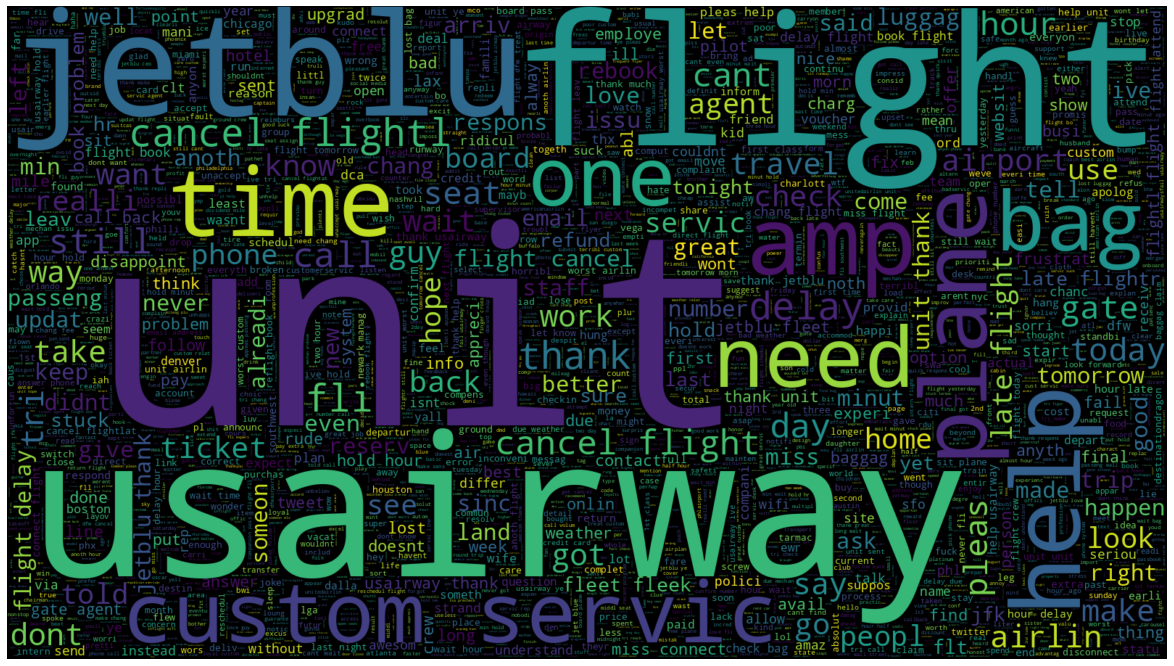

In [17]:
from wordcloud import WordCloud

text = " ".join(dataset['detokenise_sentance'].values)
plt.figure(figsize = (24,12)) 
wordcloud_figure = WordCloud(min_font_size = 2,  max_words = 3300 , width = 1600 , height = 900).generate(text)

plt.imshow(wordcloud_figure, interpolation='bilinear')
"""# Removig axis """

plt.axis("off")
plt.show()

## APPLYING VECTORISATION

In [18]:
 ## Applying TFIDF vectorisatoin

from sklearn.feature_extraction.text import TfidfVectorizer as tfidf                      ## Applying TFIDF vectorisatoin
tfidf_vect = tfidf(use_idf=True , lowercase=False)

corpus = dataset['detokenise_sentance']

X = tfidf_vect.fit(corpus)

X = tfidf_vect.transform(corpus)


# Handle Imbalanced Dataset

Negative data has been down sampled to balance the proportion of negative and positive tweets

<AxesSubplot:>

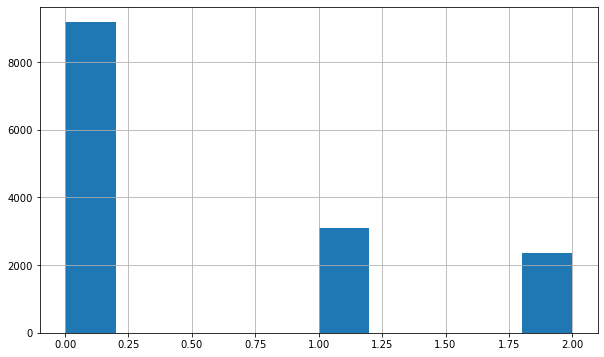

In [19]:
## 0 --> Negative
## 1 --> Neutral
## 2 --> Positive

Y_final = dataset['airline_sentiment_encoded']

dataset['airline_sentiment_encoded'].hist()

In [20]:
# Handling Imbalanced 
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_sm,Y_sm = smote.fit_resample(X,Y_final)

## Train - Test split

In [21]:
training1 , testing1 , training2 , testing2 = train_test_split(X_sm , Y_sm , test_size=0.33,random_state=42)

In [22]:
def report_gen(testing2 , prediction):                                                # defining the report Generation function
    print(" ")
    sns.heatmap(confusion_matrix(testing2, prediction) , fmt = 'd' ,annot = True)
    print(classification_report(testing2, prediction))
    print(" ")
    accuracy = accuracy_score(testing2, prediction)
    print(accuracy)
    return accuracy

# Evaluate Models

## Naive bayes

In [23]:
naive_bayes = MultinomialNB(alpha=.7)   #try gridsearch
naive_bayes.fit(training1, training2)

naive_bayes_pred = naive_bayes.predict(testing1)

 
              precision    recall  f1-score   support

           0       0.79      0.86      0.82      3092
           1       0.86      0.69      0.77      2975
           2       0.84      0.93      0.88      3020

    accuracy                           0.83      9087
   macro avg       0.83      0.83      0.82      9087
weighted avg       0.83      0.83      0.82      9087

 
0.82689556509299


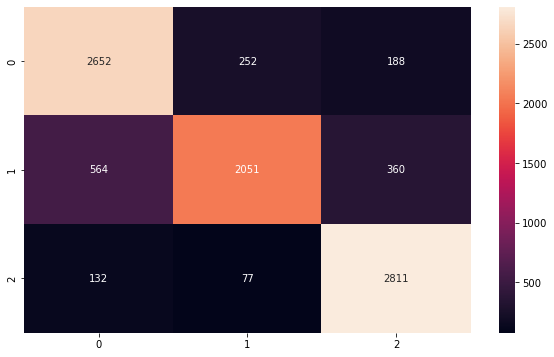

In [24]:
accuracy_nb = report_gen(testing2 , naive_bayes_pred)

### Precesion-Recall Curve

In [25]:
from yellowbrick.classifier import PrecisionRecallCurve

In [26]:
def precision_recall_curve(curve_model, trained_model, model_name):                      # Defining precision recall curve function
    curv = PrecisionRecallCurve(
        curve_model,
        classes=trained_model.classes_,
        per_class=True,
        cmap="Set1"
    )
    curv.fit(training1,training2)                                                        # Fitting our data
    curv.score(testing1, testing2)                                                       # Checking Score for the test data
#     reports_dict[model_name]["Precision-Recall Curve"] = curve.score_["negative"]
    curv.show();   


/home/ar/.local/lib/python3.9/site-packages/yellowbrick/classifier/prcurve.py:254: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


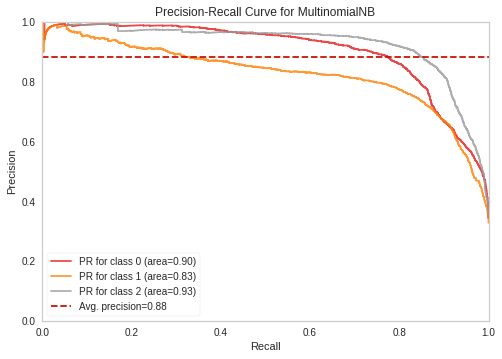

In [27]:
precision_recall_curve(MultinomialNB(), naive_bayes, "Naive Bayes")                                      # Precession recall curve for naive bayes

## Logestic Regression

In [28]:
logistic_regression = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, l1_ratio=None, max_iter=2000,multi_class='auto', n_jobs=None, penalty='l2',random_state=7824, solver='lbfgs', tol=0.00001, verbose=0,warm_start=False)
logistic_regression.fit(training1, training2)

LogisticRegression(max_iter=2000, random_state=7824, tol=1e-05)

 
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      3092
           1       0.80      0.86      0.83      2975
           2       0.90      0.90      0.90      3020

    accuracy                           0.86      9087
   macro avg       0.86      0.86      0.86      9087
weighted avg       0.86      0.86      0.86      9087

 
0.8560581049851436


/home/ar/.local/lib/python3.9/site-packages/yellowbrick/classifier/prcurve.py:254: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


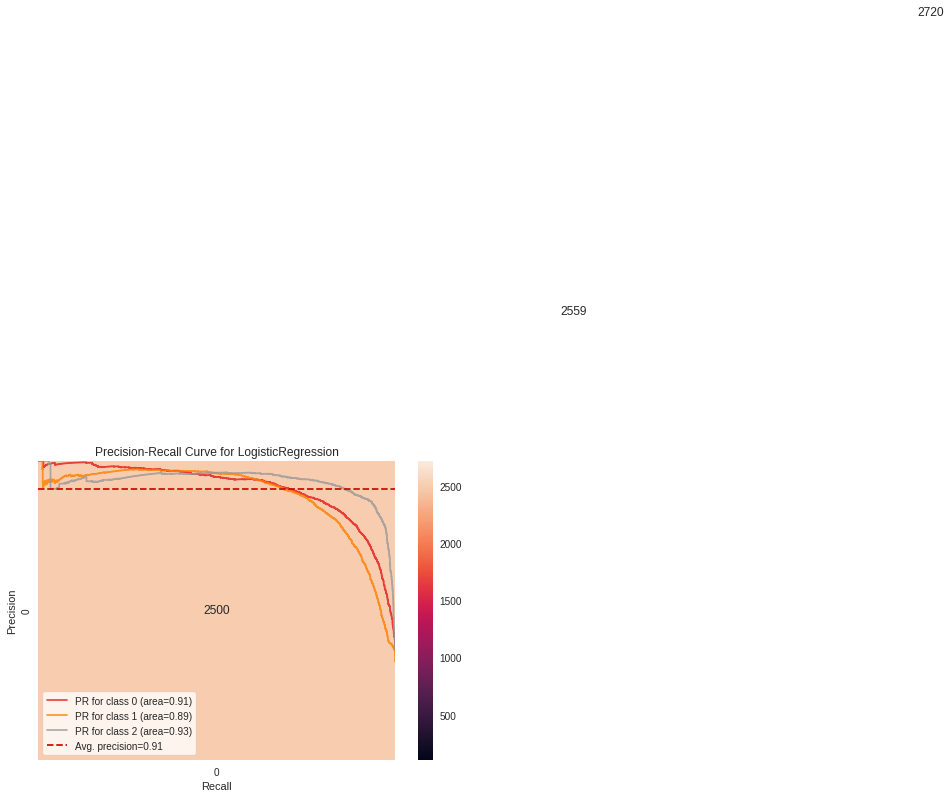

In [29]:
Y_predict_logistic_regression = logistic_regression.predict(testing1)
accuracy_logestic = report_gen(testing2 , Y_predict_logistic_regression)
precision_recall_curve(LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, l1_ratio=None, max_iter=1000,multi_class='auto', n_jobs=None, penalty='l2',random_state=7823, solver='lbfgs', tol=0.0001, verbose=0,warm_start=False), logistic_regression, "Logestic Regression")                                   

## Random Forest

In [30]:
random_forest = RandomForestClassifier(100,
                           max_depth=40,
                           random_state=0,
                           n_jobs=-1)
random_forest.fit(training1, training2)

random_forest_predict = random_forest.predict(testing1)

 
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      3092
           1       0.77      0.83      0.80      2975
           2       0.88      0.87      0.88      3020

    accuracy                           0.84      9087
   macro avg       0.84      0.84      0.84      9087
weighted avg       0.84      0.84      0.84      9087

 
0.8359194453615054


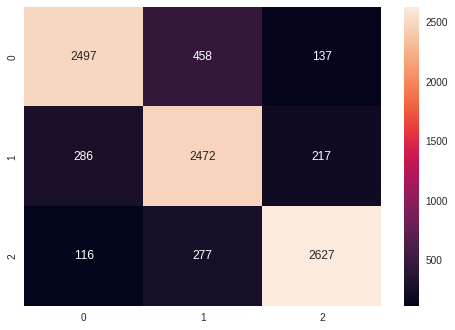

In [31]:
accuracy_rf = report_gen(testing2 , random_forest_predict)

/home/ar/.local/lib/python3.9/site-packages/yellowbrick/classifier/prcurve.py:254: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


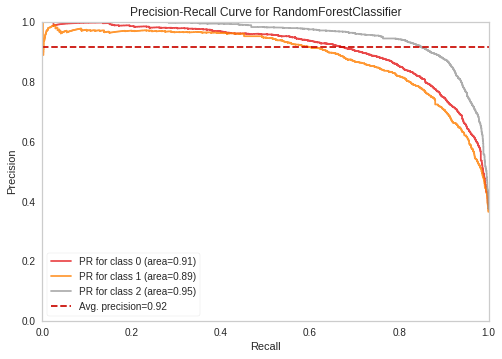

In [32]:
precision_recall_curve(RandomForestClassifier(100, max_depth=40,random_state=0,n_jobs=-1),random_forest,"Random Forest",)                               # Precession recall curve for Random  Forest

In [33]:
print("------------------- Accuracy Score ---------------------")
print(" ")
print(f"Naive Bayes          --  {accuracy_nb * 100}")
print(f"Logestic Regression  --  {accuracy_logestic * 100}")
print(f"Random Forest        --  {accuracy_rf * 100}")

------------------- Accuracy Score ---------------------
 
Naive Bayes          --  82.689556509299
Logestic Regression  --  85.60581049851436
Random Forest        --  83.59194453615054
